In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

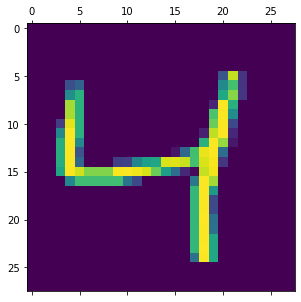

In [7]:
plt.matshow(X_train[2])
plt.show()

In [8]:
y_train[2]

4

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2709 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1227 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0667 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9839


In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9767


[0.07719168812036514, 0.9767000079154968]

In [17]:
y_predicted=model.predict(X_test)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

313/313 [==============================] - 1s 2ms/step


[7, 2, 1, 0, 4]

In [18]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

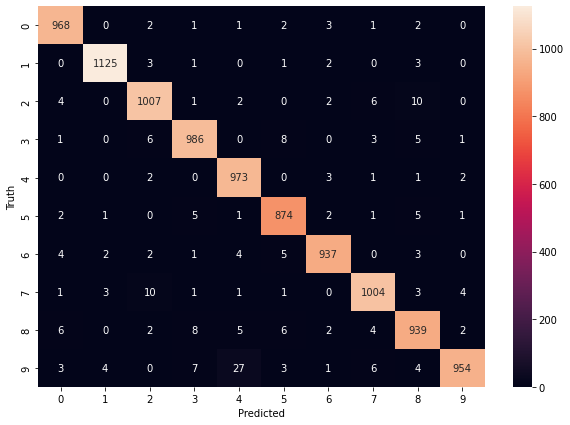

In [21]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [22]:
model.save('./3D Objects/saved_model')

INFO:tensorflow:Assets written to: ./3D Objects/saved_model\assets


In [23]:
# (1) Post Training Quantization

In [26]:
converter=tf.lite.TFLiteConverter.from_saved_model('./3D Objects/saved_model')
tflite_model=converter.convert()

In [27]:
len(tflite_model)

320004

In [28]:
converter=tf.lite.TFLiteConverter.from_saved_model('./3D Objects/saved_model')
converter.optimization=[tf.lite.Optimize.DEFAULT]
tflite_quant_model=converter.convert()

In [31]:
len(tflite_quant_model)

320004

In [32]:
with open('tflite_model.tflite','wb') as f:
    f.write(tflite_model)

with open('tflite_quant_model.tflite','wb') as f:
    f.write(tflite_quant_model)

In [39]:
# (2) Quantization Aware Training

In [35]:
import tensorflow_model_optimization as tfmot
quantize_model=tfmot.quantization.keras.quantize_model
q_aware_model=quantize_model(model)
q_aware_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy']
                     )
q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 28, 28)           3         
 er)                                                             
                                                                 
 quant_flatten (QuantizeWrap  (None, 784)              1         
 perV2)                                                          
                                                                 
 quant_dense (QuantizeWrappe  (None, 100)              78505     
 rV2)                                                            
                                                                 
 quant_dense_1 (QuantizeWrap  (None, 10)               1015      
 perV2)                                                          
                                                                 
Total params: 79,524
Trainable params: 79,510
Non-traina

In [36]:
q_aware_model.fit(X_train,y_train,epochs=1)

1875/1875 [==============================] - 9s 4ms/step - loss: 0.0457 - accuracy: 0.9862


In [37]:
q_aware_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9786


[0.07530130445957184, 0.978600025177002]

In [38]:
converter=tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_qaware_model=converter.convert()

INFO:tensorflow:Assets written to: C:\Users\power\AppData\Local\Temp\tmpqdhhn9cj\assets


INFO:tensorflow:Assets written to: C:\Users\power\AppData\Local\Temp\tmpqdhhn9cj\assets
C:\Users\power\AppData\Roaming\Python\Python310\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [40]:
with open('tflite_qaware_model.tflite','wb') as f:
    f.write(tflite_qaware_model)

In [41]:
len(tflite_qaware_model)

82736